In [1]:
import re 
from bs4 import BeautifulSoup 
import os
import nltk 
from sklearn import feature_extraction
from gensim import models
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
documentos = []
diretorio = "../dados/decisoes/mauro_campbell/"
arquivos = os.listdir(diretorio)
for arquivo in arquivos:
    caminho = diretorio + arquivo
    if os.path.isfile(caminho) and ".txt" in arquivo:
        with open(caminho,"r") as f:
            html = f.read()
        html = feature_extraction.text.strip_accents_ascii(html.lower())
        documentos.append(html.strip())

In [5]:
print(len(documentos))
docs_tokenizados = []
tokenizador = nltk.TweetTokenizer()
for doc in documentos:
    tokens = tokenizador.tokenize(doc)
    docs_tokenizados.append(tokens)

1000


In [7]:
# Salva os documentos tokenizados em formato binario
import pickle

with open('../modelos/docs_tokenizados_mauro_campbell.pkl', 'wb') as fp:
    pickle.dump(docs_tokenizados, fp)

In [8]:
palavras = []
for doc in docs_tokenizados:
    palavras.extend(doc)
unicas = set(palavras)
len(unicas)

25037

In [9]:
# Treinando um modelo Word2vec nos documentos
w2v_model = models.Word2Vec(docs_tokenizados, size=350, window=15, min_count=10, workers=os.cpu_count(),iter=300)

In [10]:
len(w2v_model.wv.vocab)

6207

In [11]:
# Cria um array com o vetor das duas mil primeiras palavras
vocab = list(w2v_model.wv.vocab)[:2000]
vetores_w2v = w2v_model.wv[vocab]

In [12]:
vetores_w2v = np.asfarray(vetores_w2v)

In [13]:
w2v_model.most_similar(positive=["ministro"])

/Users/daniel/dev/venvs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/Users/daniel/dev/venvs/p36/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('min', 0.7701529860496521),
 ('ministra', 0.6612136363983154),
 ('minha', 0.2701340913772583),
 ('12.3', 0.267130047082901),
 ('fui', 0.24008801579475403),
 ('nordeste', 0.22848020493984222),
 ('desembargador', 0.21385537087917328),
 ('ac', 0.21029922366142273),
 ('marques', 0.2074744701385498),
 ('des', 0.2044849693775177)]

In [14]:
# Reduzindo a dimensionalidade dos vetores das palavras
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
vetores_reduzidos = tsne.fit_transform(vetores_w2v)

In [15]:
# Cria um dataframe com as colunas x e y. O objetivo é transformar cada representação de uma palavra em uma coordenada.
import pandas as pd
df = pd.DataFrame(vetores_reduzidos, index=vocab, columns=['x', 'y'])
df.head()

,x,y
agrg,-6.247775,3.724999
nos,-25.613991,-14.330950
embargos,-26.603315,-1.281913
de,-9.693598,-0.931870
divergencia,-4.480735,2.639971


<IPython.core.display.Javascript object>


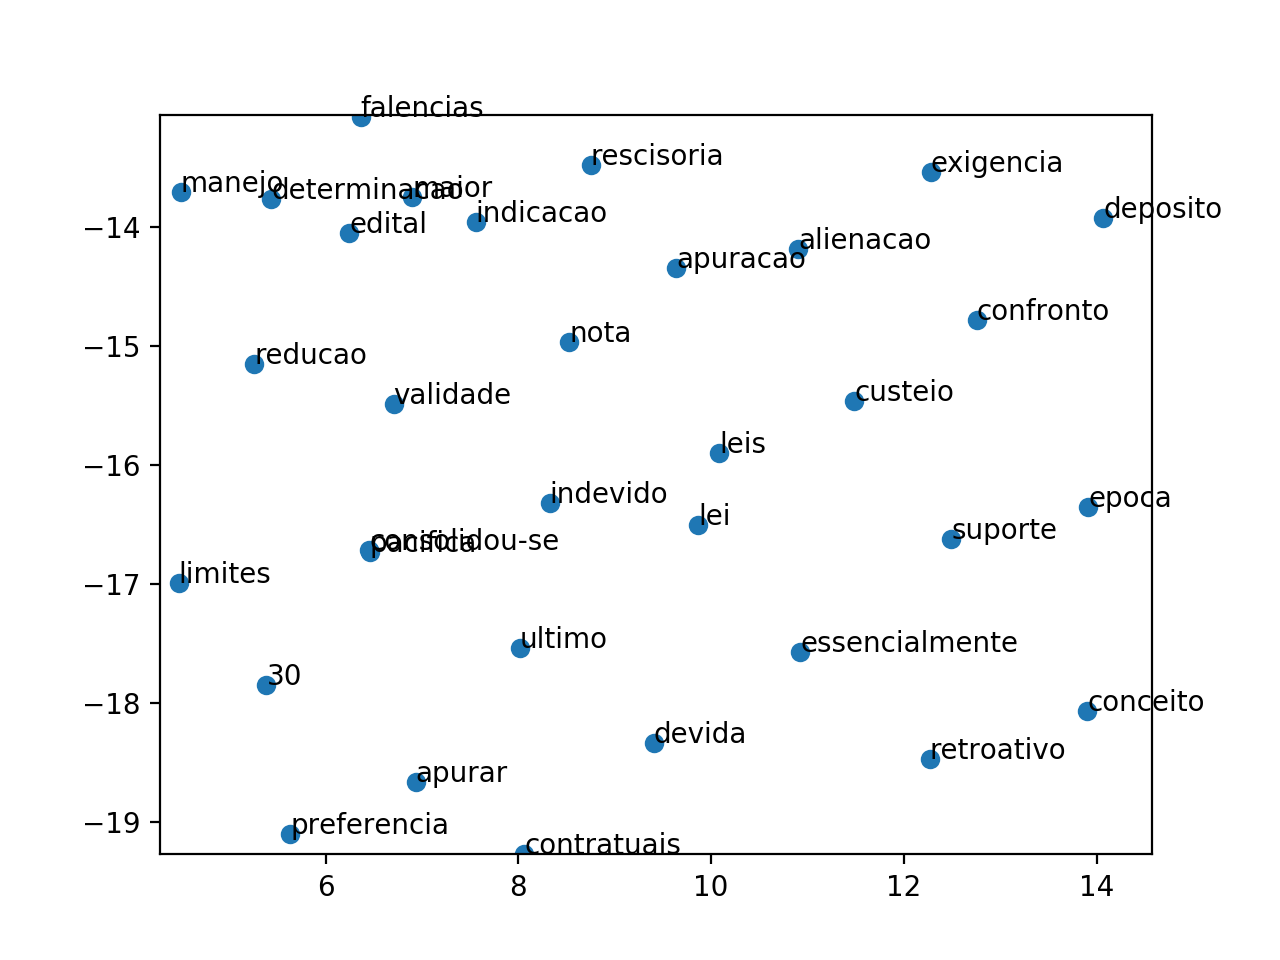

In [16]:
# Utiliza o matplotlib com a chave de interação ligada.
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for word, pos in df.iterrows():
    ax.annotate(word, pos) # Coloca a palavra em cada ponto

ax.scatter(df['x'], df['y']) # Cria um scatterPlot com todos os pontos x e y

In [18]:
w2v_model.save("../modelos/w2v_mauro_campbell_1k_decisoes_tweet_tknzr_window_15_mincount_10.model")

In [19]:
w2v_model.wv.vectors.shape

(6207, 350)